# Capstone Project - The Battle of the Neighborhoods Final 
# Finding the best place to Build Hotel in West Java and East Java (Indonesia)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction <a name="introduction"></a>

**Business Problem**

In this project we will try to find the optimal location for **a hotel with lodging facilities only without a restaurant**. Specifically, this report will be addressed to stakeholders who are interested opening **Hotel in West Java Province Hotel and East Java Province, Indonesia.**

Because there are many hotels in West Java Province and East Java province, we will try to provide a busy location with **restaurants, sports bars, basketball courts, food and drink shops and entertainment areas**. We are also very interested because hotel visitors will more freely choose the food menu around the hotel. We also prefer a location that is as close as possible to the city center, assuming that the first conditions are met.

We will use the power of our data science to generate some of the environments that best fit this criterion. The advantages of each region will then manifest the business clearly so that the best outcome can be chosen by the stakeholders.

**Purpose of this Project**

The dataset combines city coordinates in West Java and East Java. The datasets does not include the venues within these locations. With venue information, it would be easy to find out more information about the neighborhoods. For example, how many sports bars and restaurants there are, and any basketball courts or playgrounds? We could also need to find out about any banks and food and drink shops? It would be better to understand or make good choices about where the hotel will be built

Next, the reason for this project is to, algorithmically, way to use location coordinates and mark each data point into the environment in two Provinces namely West Java and East Java in Indonesia. The algorithm used is k-means clustering. The main idea is to determine neighborhood with venues clustered around each other so that one can make a decision on the right neighborhood to chose based on the proximity of amenities and venues to each other.


**K-means Clustering**

The k-means clustering algorithm is an unsupervised clustering technique searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:
1. The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
2. Each point is closer to its own cluster center than to other cluster centers in the dataset.

The two assumptions above are presumably the basis of the k-means model.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* number of **existing restaurants, sports bars, basketball courts, food and drink shops and entertainment areas in the neighborhood**
* number of and distance to restaurants, sports bars, basketball courts, food and drink shops and entertainment areas in the neighborhood, if any
* distance of neighborhood from city center

We decided to use regularly spaced grid of locations, centered around city center, to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:
* The dataset for this project consists of information regarding the cities Indonesia obtained from https://simplemaps.com/data/world-cities. Specifically, the data contain: **City, city_ascii, lat, lng , country, iso2, iso3, admin_name, capital, population and id**.
* I used business intelligence tools for **geocoding** the data to obtain the correct coordinates
* The data was then exported and converted into a .json, read into a pandas dataframe and sliced into West Java and East Java Province data for use in the project.

In [1]:
import pandas as pd # library for data analsysis
print('Libraries imported.')

Libraries imported.


In [2]:
cities_data = 'worldcities.csv'
df = pd.read_csv(cities_data)
print('The dataframe has', df.shape, 'rows and columns respectively.')
df.head()

The dataframe has (26569, 11) rows and columns respectively.


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [3]:
df.to_json("cities_data.json")

In [4]:
cities_data = "cities_data.json"
df = pd.read_json(cities_data, orient='columns')
print('The dataframe has', df.shape, 'rows and columns respectively.')
df.head()

The dataframe has (26569, 11) rows and columns respectively.


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


## Methodology <a name="data"></a>

In [5]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install selenium

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

     |████████████████████████████████| 911kB 21.4MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_

**Segmenting Indonesia Information**

the dataframe contains information of Indonesia

In [7]:
Indonesia_data = df[df.country == 'Indonesia']
Indonesia_data.head(15)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
145,Surabaya,Surabaya,-7.2458,112.7378,Indonesia,ID,IDN,Jawa Timur,admin,4975000.0,1360484663
331,Bandung,Bandung,-6.9500,107.5667,Indonesia,ID,IDN,Jawa Barat,admin,2394873.0,1360313023
336,Bekasi,Bekasi,-6.2333,107.0000,Indonesia,ID,IDN,Jawa Barat,None,2381053.0,1360006015
346,Tangerang,Tangerang,-6.1783,106.6319,Indonesia,ID,IDN,Jawa Barat,None,2237006.0,1360002844
351,Medan,Medan,3.6667,98.6667,Indonesia,ID,IDN,Sumatera Utara,admin,2210625.0,1360543171
447,Makassar,Makassar,-5.1331,119.4136,Indonesia,ID,IDN,Sulawesi Selatan,admin,1651146.0,1360051337
451,Depok,Depok,-6.3940,106.8225,Indonesia,ID,IDN,Jawa Barat,None,1631951.0,1360962899
458,Semarang,Semarang,-6.9667,110.4167,Indonesia,ID,IDN,Jawa Tengah,admin,1621384.0,1360745537
507,Palembang,Palembang,-2.9833,104.7644,Indonesia,ID,IDN,Sumatera Selatan,admin,1452456.0,1360902897




Now Indonesia data is sliced and the based on the needed columns for the project


In [8]:
cols = [0,2,3,4,7,9]
Indonesia_data = Indonesia_data[Indonesia_data.columns[cols]]
Indonesia_data.head().reset_index()

,index,city,lat,lng,country,admin_name,population
0,1,Jakarta,-6.2146,106.8451,Indonesia,Jakarta,34540000.0
1,145,Surabaya,-7.2458,112.7378,Indonesia,Jawa Timur,4975000.0
2,331,Bandung,-6.9500,107.5667,Indonesia,Jawa Barat,2394873.0
3,336,Bekasi,-6.2333,107.0000,Indonesia,Jawa Barat,2381053.0
4,346,Tangerang,-6.1783,106.6319,Indonesia,Jawa Barat,2237006.0


In [9]:
Indonesia_data.shape
print('The dataframe has', Indonesia_data.shape, 'rows and columns respectively.')

The dataframe has (131, 6) rows and columns respectively.



Let's determine the address of one location in Indonesia.

In [10]:
address = 'Indonesia'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Indonesia 27612 is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Indonesia 27612 is -2.4833826, 117.8902853.


**Install and import FOLIUM**

In [11]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [12]:

# create map of Indonesia using latitude and longitude values
map = folium.Map(location=[-2.4833826, 117.8902853], zoom_start=5)

# add markers to map
for lat, lng, city, admin_name in zip(Indonesia_data['lat'], Indonesia_data['lng'], Indonesia_data['city'], Indonesia_data['admin_name']):
    label = '{}, {}'.format(admin_name,city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map) 
map

In [34]:
map.save('mapindonesia.png',format='png')

**Segmenting West Java Province**

Let's simplify the above map and segment and clusters only the neighborhoods in West Java Province. So let's slice the original dataframe and create a new dataframe of the Jabar_data

In [13]:
jabar_data = Indonesia_data[Indonesia_data.admin_name == 'Jawa Barat']
jabar_data.drop(jabar_data.index[2], inplace=True)
print('The dataframe has', jabar_data.shape, 'rows and columns respectively.')
jabar_data.reset_index()

The dataframe has (10, 6) rows and columns respectively.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,city,lat,lng,country,admin_name,population
0,331,Bandung,-6.9500,107.5667,Indonesia,Jawa Barat,2394873.0
1,336,Bekasi,-6.2333,107.0000,Indonesia,Jawa Barat,2381053.0
2,451,Depok,-6.3940,106.8225,Indonesia,Jawa Barat,1631951.0
3,680,Bogor,-6.6000,106.8000,Indonesia,Jawa Barat,1030720.0
4,1080,Tasikmalaya,-7.3333,108.2000,Indonesia,Jawa Barat,678027.0
5,1195,Cimahi,-6.8833,107.5333,Indonesia,Jawa Barat,586580.0
6,1878,Sukabumi,-6.9197,106.9272,Indonesia,Jawa Barat,320970.0
7,1926,Cirebon,-6.7167,108.5667,Indonesia,Jawa Barat,316126.0
8,2888,Banjar,-7.3667,108.5333,Indonesia,Jawa Barat,182819.0
9,3908,Indramayu,-6.3356,108.3190,Indonesia,Jawa Barat,123263.0




Now let's get the latitude and longitude values of West Java Province


In [14]:
address = 'Jawa Barat'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of West Java Province are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of West Java Province are -6.8891904, 107.6404716.



Visualizing West Java Province Sliced Data


In [15]:

# create map of West Java using latitude and longitude values
map_jabar = folium.Map(location=[-6.8891904, 107.6404716], zoom_start=9)

# add markers to map
for lat, lng, city, admin_name in zip(jabar_data['lat'], jabar_data['lng'], jabar_data['city'], jabar_data['admin_name']):
    label = '{}, {}'.format(admin_name,city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map_jabar) 
map_jabar

In [38]:
map.save('mapjabar.png',format='png')

**West Java Province Neighborhood Cluster**

Now, the next thing to do is to utilize the Foursquare API to explore the West Java Province neighborhoods and segment them.

Let's define Foursquare Credentials and Version


In [16]:

CLIENT_ID = 'JUYOMAN513DZAY0ZXD1DBUIIV0JX2G5BE2WS1352W21G25B1' # your Foursquare ID
CLIENT_SECRET = 'VWTO4BZJNUUMIJK1VCIV4PMLRXXFNHI5I0ZXRSL1GI4WCOP2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JUYOMAN513DZAY0ZXD1DBUIIV0JX2G5BE2WS1352W21G25B1
CLIENT_SECRET:VWTO4BZJNUUMIJK1VCIV4PMLRXXFNHI5I0ZXRSL1GI4WCOP2




**Let's explore the first neighborhood in West Java Province dataframe**


In [17]:
jabar_data.loc[331,'city']
print('The first neighborhood is', jabar_data.loc[331,'city'])

The first neighborhood is Bandung



**Now we get the first neighborhood's latitude and longitude values.**


In [18]:

neighborhood_latitude = jabar_data.loc[331,'lat'] # neighborhood latitude value
neighborhood_longitude = jabar_data.loc[331,'lng'] # neighborhood longitude value

neighborhood_name = jabar_data.loc[331,'city'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bandung are -6.95, 107.5667.


**Now, let's get the top 100 venues that are city in West Java within a radius of 5 kilometers.**

First, let's create the GET request URL. Name your URL url.

In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 10000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=JUYOMAN513DZAY0ZXD1DBUIIV0JX2G5BE2WS1352W21G25B1&client_secret=VWTO4BZJNUUMIJK1VCIV4PMLRXXFNHI5I0ZXRSL1GI4WCOP2&v=20180605&ll=-6.95,107.5667&radius=10000&limit=100'


**The GET request is then sent and and the results examined**


In [20]:
results = requests.get(url).json()

**We use the get_category_type function to get the category types**

In [21]:

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Now json is cleaned and the and structured into a pandas dataframe.**

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Kartika Sari,Bakery,-6.967817,107.575290
1,Dapoer Pandan Wangi,Sundanese Restaurant,-6.928557,107.581916
2,Yogya Sumbersari Junction (Suju),Department Store,-6.931714,107.575693
3,Bakmie Karet,Asian Restaurant,-6.962992,107.555662
4,Ozt Café & Steak House,Steakhouse,-6.963522,107.565291
5,23 Paskal,Shopping Mall,-6.915411,107.594286
6,UNIQLO (ユニクロ) (UNIQLO),Clothing Store,-6.915225,107.594777
7,Prima Rasa,Bakery,-6.937581,107.600253
8,Marugame Udon,Udon Restaurant,-6.915410,107.594348
9,Starbucks,Coffee Shop,-6.915998,107.594492


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


**West Java Province Neighborhood Exploration**



**Let's create a function to collect the venues to all the neighborhoods in West Java Province**


In [25]:

def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


**Now let's write the code to run the above function on each neighborhood and create a new dataframe called jabar_venues**


In [26]:
jabar_venues = getNearbyVenues(names=jabar_data['city'],
                                   latitudes=jabar_data['lat'],
                                   longitudes=jabar_data['lng']
                                  )

Bandung
Bekasi
Depok
Bogor
Tasikmalaya
Cimahi
Sukabumi
Cirebon
Banjar
Indramayu


In [27]:
print('There are', jabar_venues.shape, 'rows and columns of venues and neighborhoods in West Java Province.')

jabar_venues.head(10)


There are (677, 7) rows and columns of venues and neighborhoods in West Java Province.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bandung,-6.95,107.5667,Kartika Sari,-6.967817,107.575290,Bakery
1,Bandung,-6.95,107.5667,Warung Sate Mekar Wangi,-6.941521,107.566668,BBQ Joint
2,Bandung,-6.95,107.5667,Bakmie Karet,-6.962992,107.555662,Asian Restaurant
3,Bandung,-6.95,107.5667,Yogya Sumbersari Junction (Suju),-6.931714,107.575693,Department Store
4,Bandung,-6.95,107.5667,Ozt Café & Steak House,-6.963522,107.565291,Steakhouse
5,Bandung,-6.95,107.5667,Dapoer Pandan Wangi,-6.928557,107.581916,Sundanese Restaurant
6,Bandung,-6.95,107.5667,CGV Cinemas,-6.959971,107.580665,Multiplex
7,Bandung,-6.95,107.5667,Richeese Factory,-6.961828,107.558641,Fast Food Restaurant
8,Bandung,-6.95,107.5667,J.Co Donuts & Coffee,-6.959748,107.580287,Donut Shop
9,Bandung,-6.95,107.5667,Pizza Hut,-6.966327,107.575750,Pizza Place


Text(0, 0.5, 'Venue Count')

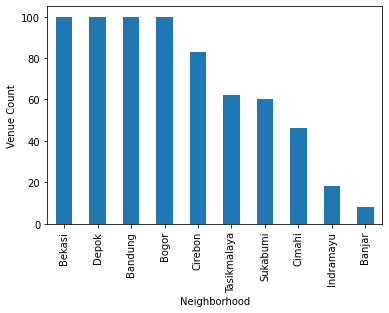

In [28]:
plot1=jabar_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')



Check how many venues were returned for each neighborhood


In [29]:
venue_counts = jabar_venues.groupby('Neighborhood').count()
venue_counts

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bandung,100,100,100,100,100,100
Banjar,8,8,8,8,8,8
Bekasi,100,100,100,100,100,100
Bogor,100,100,100,100,100,100
Cimahi,46,46,46,46,46,46
Cirebon,83,83,83,83,83,83
Depok,100,100,100,100,100,100
Indramayu,18,18,18,18,18,18
Sukabumi,60,60,60,60,60,60


In [30]:
print('There are {} uniques categories.'.format(len(jabar_venues['Venue Category'].unique())))

There are 127 uniques categories.



**Analyze Each Neighborhood in West Java Province**

In [31]:
# one hot encoding
jabar_onehot = pd.get_dummies(jabar_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
jabar_onehot['Neighborhood'] = jabar_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [jabar_onehot.columns[-1]] + list(jabar_onehot.columns[:-1])
jabar_onehot = jabar_onehot[fixed_columns]

jabar_onehot.head()

,Neighborhood,Afghan Restaurant,Airport,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Balinese Restaurant,Beach,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Botanical Garden,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Burger Joint,Café,Car Wash,Chinese Restaurant,Church,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Historic Site,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indonesian Meatball Place,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Lounge,Mac & Cheese Joint,Manadonese Restaurant,Market,Massage Studio,Middle Eastern Restaurant,Motel,Movie Theater,Multiplex,Music Venue,Nightclub,Noodle House,Office,Other Great Outdoors,Padangnese Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Racetrack,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Satay Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvenir Shop,Spa,Sports Bar,Stadium,Steakhouse,Sundanese Restaurant,Supermarket,Sushi Restaurant,Tattoo Parlor,Tech Startup,Thai Restaurant,Trail,Train Station,Udon Restaurant,Vietnamese Restaurant,Water Park,Wings Joint
0,Bandung,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bandung,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bandung,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bandung,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bandung,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
jabar_onehot.shape
print('The dataframe has', jabar_onehot.shape, 'rows and columns respectively.')

The dataframe has (677, 128) rows and columns respectively.




**Let's group rows by neighborhood by taking the mean of the frequency of occurrence of each category**



In [33]:
jabar_grouped = jabar_onehot.groupby('Neighborhood').mean().reset_index()
jabar_grouped

,Neighborhood,Afghan Restaurant,Airport,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Balinese Restaurant,Beach,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Botanical Garden,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Burger Joint,Café,Car Wash,Chinese Restaurant,Church,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Historic Site,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indonesian Meatball Place,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Lounge,Mac & Cheese Joint,Manadonese Restaurant,Market,Massage Studio,Middle Eastern Restaurant,Motel,Movie Theater,Multiplex,Music Venue,Nightclub,Noodle House,Office,Other Great Outdoors,Padangnese Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Racetrack,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Satay Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvenir Shop,Spa,Sports Bar,Stadium,Steakhouse,Sundanese Restaurant,Supermarket,Sushi Restaurant,Tattoo Parlor,Tech Startup,Thai Restaurant,Trail,Train Station,Udon Restaurant,Vietnamese Restaurant,Water Park,Wings Joint
0,Bandung,0.000000,0.000000,0.00,0.000000,0.000000,0.060000,0.010000,0.060000,0.040000,0.01,0.000000,0.000000,0.010000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.01,0.030000,0.01,0.070000,0.000000,0.03,0.060000,0.000000,0.040000,0.00,0.010000,0.020000,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.00,0.000000,0.000000,0.000000,0.030000,0.010000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.010000,0.00,0.000000,0.000000,0.040000,0.000000,0.000000,0.00,0.000000,0.060000,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.020000,0.000000,0.00,0.000000,0.01,0.030000,0.01,0.00,0.060000,0.010000,0.00,0.010000,0.00,0.000000,0.00,0.00,0.030000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.01,0.000000,0.00,0.000000,0.020000,0.000000,0.020000,0.000000,0.000000,0.010000,0.000000,0.00,0.00,0.000000,0.010000,0.010000,0.030000,0.01,0.01,0.000000,0.00,0.000000,0.000000,0.01,0.01,0.000000,0.01
1,Banjar,0.000000,0.000000,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.125000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.125000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.125000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.125,0.125000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.125000,0.00,0.00,0.000000,0.00
2,Bekasi,0.000000,0.000000,0.01,0.010000,0.000000,0.060000,0.000000,0.010000,0.030000,0.00,0.000000,0.000000,0.000000,0.01,0.000000,0.00,0.00,0.000000,0.00,0.01,0.000000,0.00,0.030000,0.000000,0.00,0.060000,0.000000,0.000000,0.00,0.010000,0.020000,0.010000,0.000000,0.



**Print each neighborhood along with the top 5 most common venues**


In [34]:
num_top_venues = 5

for hood in jabar_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = jabar_grouped[jabar_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bandung----
                   venue  freq
0     Chinese Restaurant  0.07
1            Coffee Shop  0.06
2           Noodle House  0.06
3       Asian Restaurant  0.06
4  Indonesian Restaurant  0.06


----Banjar----
           venue  freq
0     Restaurant  0.12
1  Train Station  0.12
2         Market  0.12
3           Park  0.12
4      Rest Area  0.12


----Bekasi----
                   venue  freq
0  Indonesian Restaurant  0.10
1       Asian Restaurant  0.06
2   Fast Food Restaurant  0.06
3            Coffee Shop  0.06
4            Pizza Place  0.05


----Bogor----
                   venue  freq
0  Indonesian Restaurant  0.09
1                  Hotel  0.07
2            Coffee Shop  0.07
3                   Café  0.07
4                 Bakery  0.06


----Cimahi----
                   venue  freq
0      Convenience Store  0.09
1                   Café  0.09
2            Coffee Shop  0.07
3  Indonesian Restaurant  0.07
4    Japanese Restaurant  0.04


----Cirebon----
                 

**Let's put that into a pandas dataframe**

First, let's write a function to sort the venues in descending order.

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [36]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = jabar_grouped['Neighborhood']

for ind in np.arange(jabar_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jabar_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bandung,Chinese Restaurant,BBQ Joint,Asian Restaurant,Coffee Shop,Indonesian Restaurant,Noodle House,Hotel,Convenience Store,Bakery,Pizza Place
1,Banjar,Department Store,Indonesian Restaurant,Rest Area,Asian Restaurant,Restaurant,Train Station,Park,Market,Donut Shop,Dog Run
2,Bekasi,Indonesian Restaurant,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Pizza Place,Pool,Multiplex,Hotel,Chinese Restaurant,Food Court
3,Bogor,Indonesian Restaurant,Hotel,Café,Coffee Shop,Bakery,Restaurant,Noodle House,Asian Restaurant,Dessert Shop,Bistro
4,Cimahi,Convenience Store,Café,Indonesian Restaurant,Coffee Shop,Noodle House,Japanese Restaurant,Pool,Pizza Place,Supermarket,Department Store
5,Cirebon,Hotel,Indonesian Restaurant,Coffee Shop,Steakhouse,Food Truck,Café,Bakery,Diner,Soccer Stadium,Seafood Restaurant
6,Depok,Indonesian Restaurant,Fast Food Restaurant,Café,Coffee Shop,Japanese Restaurant,Asian Restaurant,Bakery,Chinese Restaurant,Seafood Restaurant,Snack Place
7,Indramayu,Hotel,Stadium,Food Truck,Indonesian Restaurant,Motel,Plaza,Eastern European Restaurant,Department Store,Chinese Restaurant,Food
8,Sukabumi,Indonesian Restaurant,Coffee Shop,Hotel,Snack Place,Noodle House,Seafood Restaurant,Karaoke Bar,Café,Food Truck,Steakhouse
9,Tasikmalaya,Sundanese Restaurant,Indonesian Meatball Place,Hotel,Indonesian Restaurant,Café,Coffee Shop,Supermarket,Juice Bar,Diner,Soup Place


In [37]:
neighborhoods_venues_sorted.shape
print('The dataframe has', neighborhoods_venues_sorted.shape, 'rows and columns respectively.')

The dataframe has (10, 11) rows and columns respectively.


**Clustering the Neighborhoods in West Java Province**


k-means to cluster the neighborhood into 4 clusters.


In [38]:

jabar_merged = jabar_data

# set number of clusters
kclusters = 4

jabar_grouped_clustering = jabar_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(jabar_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 1, 1, 1, 1, 1, 3, 1, 0], dtype=int32)



Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [39]:
neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bandung,Chinese Restaurant,BBQ Joint,Asian Restaurant,Coffee Shop,Indonesian Restaurant,Noodle House,Hotel,Convenience Store,Bakery,Pizza Place
1,Banjar,Department Store,Indonesian Restaurant,Rest Area,Asian Restaurant,Restaurant,Train Station,Park,Market,Donut Shop,Dog Run
2,Bekasi,Indonesian Restaurant,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Pizza Place,Pool,Multiplex,Hotel,Chinese Restaurant,Food Court
3,Bogor,Indonesian Restaurant,Hotel,Café,Coffee Shop,Bakery,Restaurant,Noodle House,Asian Restaurant,Dessert Shop,Bistro
4,Cimahi,Convenience Store,Café,Indonesian Restaurant,Coffee Shop,Noodle House,Japanese Restaurant,Pool,Pizza Place,Supermarket,Department Store
5,Cirebon,Hotel,Indonesian Restaurant,Coffee Shop,Steakhouse,Food Truck,Café,Bakery,Diner,Soccer Stadium,Seafood Restaurant
6,Depok,Indonesian Restaurant,Fast Food Restaurant,Café,Coffee Shop,Japanese Restaurant,Asian Restaurant,Bakery,Chinese Restaurant,Seafood Restaurant,Snack Place
7,Indramayu,Hotel,Stadium,Food Truck,Indonesian Restaurant,Motel,Plaza,Eastern European Restaurant,Department Store,Chinese Restaurant,Food
8,Sukabumi,Indonesian Restaurant,Coffee Shop,Hotel,Snack Place,Noodle House,Seafood Restaurant,Karaoke Bar,Café,Food Truck,Steakhouse
9,Tasikmalaya,Sundanese Restaurant,Indonesian Meatball Place,Hotel,Indonesian Restaurant,Café,Coffee Shop,Supermarket,Juice Bar,Diner,Soup Place


In [42]:
neighborhoods_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_) 

jabar_merged = jabar_data

jabar_merged = jabar_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='city')

jabar_merged.head(10)

,city,lat,lng,country,admin_name,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
331,Bandung,-6.9500,107.5667,Indonesia,Jawa Barat,2394873.0,1,Chinese Restaurant,BBQ Joint,Asian Restaurant,Coffee Shop,Indonesian Restaurant,Noodle House,Hotel,Convenience Store,Bakery,Pizza Place
336,Bekasi,-6.2333,107.0000,Indonesia,Jawa Barat,2381053.0,1,Indonesian Restaurant,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Pizza Place,Pool,Multiplex,Hotel,Chinese Restaurant,Food Court
451,Depok,-6.3940,106.8225,Indonesia,Jawa Barat,1631951.0,1,Indonesian Restaurant,Fast Food Restaurant,Café,Coffee Shop,Japanese Restaurant,Asian Restaurant,Bakery,Chinese Restaurant,Seafood Restaurant,Snack Place
680,Bogor,-6.6000,106.8000,Indonesia,Jawa Barat,1030720.0,1,Indonesian Restaurant,Hotel,Café,Coffee Shop,Bakery,Restaurant,Noodle House,Asian Restaurant,Dessert Shop,Bistro
1080,Tasikmalaya,-7.3333,108.2000,Indonesia,Jawa Barat,678027.0,0,Sundanese Restaurant,Indonesian Meatball Place,Hotel,Indonesian Restaurant,Café,Coffee Shop,Supermarket,Juice Bar,Diner,Soup Place
1195,Cimahi,-6.8833,107.5333,Indonesia,Jawa Barat,586580.0,1,Convenience Store,Café,Indonesian Restaurant,Coffee Shop,Noodle House,Japanese Restaurant,Pool,Pizza Place,Supermarket,Department Store
1878,Sukabumi,-6.9197,106.9272,Indonesia,Jawa Barat,320970.0,1,Indonesian Restaurant,Coffee Shop,Hotel,Snack Place,Noodle House,Seafood Restaurant,Karaoke Bar,Café,Food Truck,Steakhouse
1926,Cirebon,-6.7167,108.5667,Indonesia,Jawa Barat,316126.0,1,Hotel,Indonesian Restaurant,Coffee Shop,Steakhouse,Food Truck,Café,Bakery,Diner,Soccer Stadium,Seafood Restaurant
2888,Banjar,-7.3667,108.5333,Indonesia,Jawa Barat,182819.0,2,Department Store,Indonesian Restaurant,Rest Area,Asian Restaurant,Restaurant,Train Station,Park,Market,Donut Shop,Dog Run
3908,Indramayu,-6.3356,108.3190,Indonesia,Jawa Barat,123263.0,3,Hotel,Stadium,Food Truck,Indonesian Restaurant,Motel,Plaza,Eastern European Restaurant,Department Store,Chinese Restaurant,Food


In [75]:
# create map
map_clusters_jabar = folium.Map(location=[-6.8891904, 107.6404716], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jabar_merged['lat'], jabar_merged['lng'], jabar_merged['city'], jabar_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=30,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_jabar)
       
from folium.plugins import FloatImage
image_file = 'http://printad.us/wp-content/uploads/2018/07/jabar-zip-code-map-mapsjabar-indonesia-map-a-history-of-zip-code-jabar-for-557-x-575-pixels.jpg'

FloatImage(image_file, bottom=0, left=70).add_to(map_clusters_jabar)
map_clusters_jabar

In [ ]:
map.save('map.html')

<Figure size 720x720 with 0 Axes>

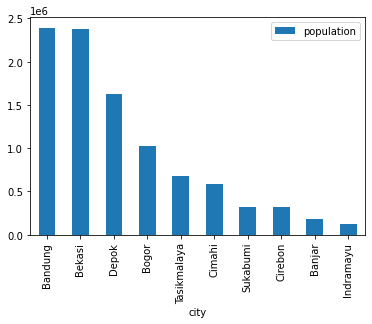

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#jabar_merged.hist(column='Density')
jabar_merged.plot(kind='bar',x='city',y='population')#, color=rainbow[cluster])
plt.show()

**Let's Examine The Clusters**

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you

**Cluster 1 - Authentic Restaurant**

In [46]:
jabar_merged.loc[jabar_merged['Cluster Labels'] == 0.0, jabar_merged.columns[[0]+[1]+[2] + list(range(5, jabar_merged.shape[1]))]]

,city,lat,lng,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1080,Tasikmalaya,-7.3333,108.2,678027.0,0,Sundanese Restaurant,Indonesian Meatball Place,Hotel,Indonesian Restaurant,Café,Coffee Shop,Supermarket,Juice Bar,Diner,Soup Place


**Cluster 2 - Indonesia Restoran Nearby Jakarta**

In [47]:
jabar_merged.loc[jabar_merged['Cluster Labels'] == 1, jabar_merged.columns[[0]+[1]+[2] + list(range(5, jabar_merged.shape[1]))]]

,city,lat,lng,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
331,Bandung,-6.9500,107.5667,2394873.0,1,Chinese Restaurant,BBQ Joint,Asian Restaurant,Coffee Shop,Indonesian Restaurant,Noodle House,Hotel,Convenience Store,Bakery,Pizza Place
336,Bekasi,-6.2333,107.0000,2381053.0,1,Indonesian Restaurant,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Pizza Place,Pool,Multiplex,Hotel,Chinese Restaurant,Food Court
451,Depok,-6.3940,106.8225,1631951.0,1,Indonesian Restaurant,Fast Food Restaurant,Café,Coffee Shop,Japanese Restaurant,Asian Restaurant,Bakery,Chinese Restaurant,Seafood Restaurant,Snack Place
680,Bogor,-6.6000,106.8000,1030720.0,1,Indonesian Restaurant,Hotel,Café,Coffee Shop,Bakery,Restaurant,Noodle House,Asian Restaurant,Dessert Shop,Bistro
1195,Cimahi,-6.8833,107.5333,586580.0,1,Convenience Store,Café,Indonesian Restaurant,Coffee Shop,Noodle House,Japanese Restaurant,Pool,Pizza Place,Supermarket,Department Store
1878,Sukabumi,-6.9197,106.9272,320970.0,1,Indonesian Restaurant,Coffee Shop,Hotel,Snack Place,Noodle House,Seafood Restaurant,Karaoke Bar,Café,Food Truck,Steakhouse
1926,Cirebon,-6.7167,108.5667,316126.0,1,Hotel,Indonesian Restaurant,Coffee Shop,Steakhouse,Food Truck,Café,Bakery,Diner,Soccer Stadium,Seafood Restaurant


**Cluster 3 - Shoping and Nearby Central Java**

In [48]:
jabar_merged.loc[jabar_merged['Cluster Labels'] == 2, jabar_merged.columns[[0]+[1]+[2] + list(range(5, jabar_merged.shape[1]))]]

,city,lat,lng,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2888,Banjar,-7.3667,108.5333,182819.0,2,Department Store,Indonesian Restaurant,Rest Area,Asian Restaurant,Restaurant,Train Station,Park,Market,Donut Shop,Dog Run


**Cluster 4 - Beach view**

In [49]:
jabar_merged.loc[jabar_merged['Cluster Labels'] == 3, jabar_merged.columns[[0]+[1]+[2] + list(range(5, jabar_merged.shape[1]))]]

,city,lat,lng,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3908,Indramayu,-6.3356,108.319,123263.0,3,Hotel,Stadium,Food Truck,Indonesian Restaurant,Motel,Plaza,Eastern European Restaurant,Department Store,Chinese Restaurant,Food



**Segmenting East Java Province, Indonesia.**




Slice the original dataframe and create a new dataframe of the East Java Province, Indonesia data.


In [50]:
jatim_data = Indonesia_data[Indonesia_data.admin_name == 'Jawa Timur']
jatim_data.drop(jatim_data.index[2], inplace=True)
print('The dataframe has', jatim_data.shape, 'rows and columns respectively.')
jatim_data.reset_index()

The dataframe has (12, 6) rows and columns respectively.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,city,lat,lng,country,admin_name,population
0,145,Surabaya,-7.2458,112.7378,Indonesia,Jawa Timur,4975000.0
1,977,Malang,-7.9800,112.6200,Indonesia,Jawa Timur,780000.0
2,2256,Kediri,-7.8166,112.0119,Indonesia,Jawa Timur,252000.0
3,2474,Probolinggo,-7.7500,113.2167,Indonesia,Jawa Timur,223159.0
4,2801,Madiun,-7.6300,111.5231,Indonesia,Jawa Timur,186099.0
5,2807,Pasuruan,-7.6406,112.9065,Indonesia,Jawa Timur,186262.0
6,2813,Batu,-7.8672,112.5239,Indonesia,Jawa Timur,190184.0
7,3040,Banyuwangi,-8.1950,114.3696,Indonesia,Jawa Timur,172424.0
8,3617,Mojokerto,-7.4722,112.4336,Indonesia,Jawa Timur,130196.0
9,3661,Blitar,-8.1000,112.1500,Indonesia,Jawa Timur,132018.0




Now let's get the latitude and longitude values of East Java ProvinceEast Java Province


In [51]:
address = 'Jawa Timur'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of East Java Province are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of East Java Province are -7.6977397, 112.4914199.


**Visualizing East Java Sliced Data**

In [52]:

# create map of NC using latitude and longitude values
map_jatim = folium.Map(location=[-7.6977397, 112.4914199], zoom_start=8.5)

# add markers to map
for lat, lng, city, admin_name in zip(jatim_data['lat'], jatim_data['lng'], jatim_data['city'], jatim_data['admin_name']):
    label = '{}, {}'.format(admin_name,city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map_jatim) 
map_jatim


Let's get the first neighborhood in East Java Province


In [53]:

neighborhood_latitude_jatim= jatim_data.loc[145,'lat'] # neighborhood latitude value
neighborhood_longitude_jatim = jatim_data.loc[145,'lng'] # neighborhood longitude value

neighborhood_name_jatim = jatim_data.loc[145,'city'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name_jatim, 
                                                               neighborhood_latitude_jatim, 
                                                               neighborhood_longitude_jatim))

Latitude and longitude values of Surabaya are -7.2458, 112.7378.



Now let's write the code to run the above function on each neighborhood and create a new dataframe called jatim_venues


In [54]:
jatim_venues = getNearbyVenues(names=jatim_data['city'],
                                   latitudes=jabar_data['lat'],
                                   longitudes=jabar_data['lng']
                                  )

Surabaya
Malang
Kediri
Probolinggo
Madiun
Pasuruan
Batu
Banyuwangi
Mojokerto
Blitar


In [55]:
print('There are', jatim_venues.shape, 'rows and columns of venues and neighborhoods in East Java Province.')

jatim_venues.head(10)


There are (677, 7) rows and columns of venues and neighborhoods in East Java Province.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Surabaya,-6.95,107.5667,Kartika Sari,-6.967817,107.575290,Bakery
1,Surabaya,-6.95,107.5667,Warung Sate Mekar Wangi,-6.941521,107.566668,BBQ Joint
2,Surabaya,-6.95,107.5667,Bakmie Karet,-6.962992,107.555662,Asian Restaurant
3,Surabaya,-6.95,107.5667,Yogya Sumbersari Junction (Suju),-6.931714,107.575693,Department Store
4,Surabaya,-6.95,107.5667,Ozt Café & Steak House,-6.963522,107.565291,Steakhouse
5,Surabaya,-6.95,107.5667,Dapoer Pandan Wangi,-6.928557,107.581916,Sundanese Restaurant
6,Surabaya,-6.95,107.5667,CGV Cinemas,-6.959971,107.580665,Multiplex
7,Surabaya,-6.95,107.5667,Richeese Factory,-6.961828,107.558641,Fast Food Restaurant
8,Surabaya,-6.95,107.5667,J.Co Donuts & Coffee,-6.959748,107.580287,Donut Shop
9,Surabaya,-6.95,107.5667,Pizza Hut,-6.966327,107.575750,Pizza Place


Text(0, 0.5, 'Venue Count')

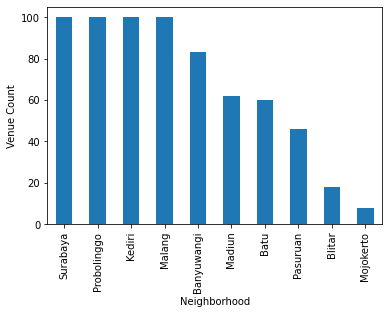

In [56]:
plot1=jatim_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')




Check how many venues were returned for each neighborhood


In [57]:
venue_counts_jatim = jatim_venues.groupby('Neighborhood').count()
venue_counts_jatim


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Banyuwangi,83,83,83,83,83,83
Batu,60,60,60,60,60,60
Blitar,18,18,18,18,18,18
Kediri,100,100,100,100,100,100
Madiun,62,62,62,62,62,62
Malang,100,100,100,100,100,100
Mojokerto,8,8,8,8,8,8
Pasuruan,46,46,46,46,46,46
Probolinggo,100,100,100,100,100,100




Let's find out how many unique categories can be curated from all the returned venues


In [58]:
print('There are {} uniques categories.'.format(len(jatim_venues['Venue Category'].unique())))


There are 127 uniques categories.



Analyze Each Neighborhood in East Java.


In [59]:
# one hot encoding
jatim_onehot = pd.get_dummies(jatim_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
jatim_onehot['Neighborhood'] = jatim_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [jatim_onehot.columns[-1]] + list(jatim_onehot.columns[:-1])
jatim_onehot = jatim_onehot[fixed_columns]

jatim_onehot.head()


,Neighborhood,Afghan Restaurant,Airport,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Balinese Restaurant,Beach,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Botanical Garden,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Burger Joint,Café,Car Wash,Chinese Restaurant,Church,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Historic Site,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indonesian Meatball Place,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Lounge,Mac & Cheese Joint,Manadonese Restaurant,Market,Massage Studio,Middle Eastern Restaurant,Motel,Movie Theater,Multiplex,Music Venue,Nightclub,Noodle House,Office,Other Great Outdoors,Padangnese Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Racetrack,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Satay Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvenir Shop,Spa,Sports Bar,Stadium,Steakhouse,Sundanese Restaurant,Supermarket,Sushi Restaurant,Tattoo Parlor,Tech Startup,Thai Restaurant,Trail,Train Station,Udon Restaurant,Vietnamese Restaurant,Water Park,Wings Joint
0,Surabaya,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Surabaya,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Surabaya,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Surabaya,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Surabaya,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
jatim_onehot.shape
print('The dataframe has', jatim_onehot.shape, 'rows and columns respectively.')


The dataframe has (677, 128) rows and columns respectively.




Print each neighborhood along with the top 5 most common venues


In [61]:
jatim_grouped = jatim_onehot.groupby('Neighborhood').mean().reset_index()
jatim_grouped


num_top_venues = 5

for hood in jatim_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = jatim_grouped[jatim_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Banyuwangi----
                   venue  freq
0                  Hotel  0.16
1  Indonesian Restaurant  0.07
2            Coffee Shop  0.05
3             Food Truck  0.04
4                 Bakery  0.04


----Batu----
                   venue  freq
0  Indonesian Restaurant  0.15
1            Coffee Shop  0.13
2                  Hotel  0.10
3            Snack Place  0.07
4           Noodle House  0.05


----Blitar----
        venue  freq
0       Hotel  0.17
1     Stadium  0.11
2  Food Truck  0.11
3  Food Court  0.06
4       Beach  0.06


----Kediri----
                   venue  freq
0  Indonesian Restaurant  0.12
1   Fast Food Restaurant  0.06
2            Coffee Shop  0.05
3                   Café  0.05
4       Asian Restaurant  0.04


----Madiun----
                       venue  freq
0       Sundanese Restaurant  0.13
1  Indonesian Meatball Place  0.11
2                      Hotel  0.10
3      Indonesian Restaurant  0.08
4                       Café  0.08


----Malang----
          

In [62]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_jatim = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_jatim['Neighborhood'] = jatim_grouped['Neighborhood']

for ind in np.arange(jabar_grouped.shape[0]):
    neighborhoods_venues_sorted_jatim.iloc[ind, 1:] = return_most_common_venues(jatim_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_jatim

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Banyuwangi,Hotel,Indonesian Restaurant,Coffee Shop,Steakhouse,Food Truck,Café,Bakery,Diner,Soccer Stadium,Seafood Restaurant
1,Batu,Indonesian Restaurant,Coffee Shop,Hotel,Snack Place,Noodle House,Seafood Restaurant,Karaoke Bar,Café,Food Truck,Steakhouse
2,Blitar,Hotel,Stadium,Food Truck,Indonesian Restaurant,Motel,Plaza,Eastern European Restaurant,Department Store,Chinese Restaurant,Food
3,Kediri,Indonesian Restaurant,Fast Food Restaurant,Café,Coffee Shop,Japanese Restaurant,Asian Restaurant,Bakery,Chinese Restaurant,Seafood Restaurant,Snack Place
4,Madiun,Sundanese Restaurant,Indonesian Meatball Place,Hotel,Indonesian Restaurant,Café,Coffee Shop,Supermarket,Juice Bar,Diner,Soup Place
5,Malang,Indonesian Restaurant,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Pizza Place,Pool,Multiplex,Hotel,Chinese Restaurant,Food Court
6,Mojokerto,Department Store,Indonesian Restaurant,Rest Area,Asian Restaurant,Restaurant,Train Station,Park,Market,Donut Shop,Dog Run
7,Pasuruan,Convenience Store,Café,Indonesian Restaurant,Coffee Shop,Noodle House,Japanese Restaurant,Pool,Pizza Place,Supermarket,Department Store
8,Probolinggo,Indonesian Restaurant,Hotel,Café,Coffee Shop,Bakery,Restaurant,Noodle House,Asian Restaurant,Dessert Shop,Bistro
9,Surabaya,Chinese Restaurant,BBQ Joint,Asian Restaurant,Coffee Shop,Indonesian Restaurant,Noodle House,Hotel,Convenience Store,Bakery,Pizza Place


In [64]:
neighborhoods_venues_sorted_jatim.shape
print('The dataframe has', neighborhoods_venues_sorted_jatim.shape, 'rows and columns respectively.')

The dataframe has (10, 11) rows and columns respectively.


In [65]:
jatim_merged = jatim_data

# set number of clusters
kclusters = 4

jatim_grouped_clustering = jabar_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(jatim_grouped_clustering)

# check cluster labels generated for each row in the dataframe


In [76]:
neighborhoods_venues_sorted_jatim.head(10)


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Banyuwangi,Hotel,Indonesian Restaurant,Coffee Shop,Steakhouse,Food Truck,Café,Bakery,Diner,Soccer Stadium,Seafood Restaurant
1,2,Batu,Indonesian Restaurant,Coffee Shop,Hotel,Snack Place,Noodle House,Seafood Restaurant,Karaoke Bar,Café,Food Truck,Steakhouse
2,1,Blitar,Hotel,Stadium,Food Truck,Indonesian Restaurant,Motel,Plaza,Eastern European Restaurant,Department Store,Chinese Restaurant,Food
3,1,Kediri,Indonesian Restaurant,Fast Food Restaurant,Café,Coffee Shop,Japanese Restaurant,Asian Restaurant,Bakery,Chinese Restaurant,Seafood Restaurant,Snack Place
4,1,Madiun,Sundanese Restaurant,Indonesian Meatball Place,Hotel,Indonesian Restaurant,Café,Coffee Shop,Supermarket,Juice Bar,Diner,Soup Place
5,1,Malang,Indonesian Restaurant,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Pizza Place,Pool,Multiplex,Hotel,Chinese Restaurant,Food Court
6,1,Mojokerto,Department Store,Indonesian Restaurant,Rest Area,Asian Restaurant,Restaurant,Train Station,Park,Market,Donut Shop,Dog Run
7,3,Pasuruan,Convenience Store,Café,Indonesian Restaurant,Coffee Shop,Noodle House,Japanese Restaurant,Pool,Pizza Place,Supermarket,Department Store
8,1,Probolinggo,Indonesian Restaurant,Hotel,Café,Coffee Shop,Bakery,Restaurant,Noodle House,Asian Restaurant,Dessert Shop,Bistro
9,0,Surabaya,Chinese Restaurant,BBQ Joint,Asian Restaurant,Coffee Shop,Indonesian Restaurant,Noodle House,Hotel,Convenience Store,Bakery,Pizza Place


In [68]:
neighborhoods_venues_sorted_jatim.insert(0,'Cluster Labels', kmeans.labels_)

jatim_merged = jatim_data

jatim_merged = jatim_merged.join(neighborhoods_venues_sorted_jatim.set_index('Neighborhood'), on='city')

jatim_merged.head(10)


,city,lat,lng,country,admin_name,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
145,Surabaya,-7.2458,112.7378,Indonesia,Jawa Timur,4975000.0,0.0,Chinese Restaurant,BBQ Joint,Asian Restaurant,Coffee Shop,Indonesian Restaurant,Noodle House,Hotel,Convenience Store,Bakery,Pizza Place
977,Malang,-7.9800,112.6200,Indonesia,Jawa Timur,780000.0,1.0,Indonesian Restaurant,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Pizza Place,Pool,Multiplex,Hotel,Chinese Restaurant,Food Court
2256,Kediri,-7.8166,112.0119,Indonesia,Jawa Timur,252000.0,1.0,Indonesian Restaurant,Fast Food Restaurant,Café,Coffee Shop,Japanese Restaurant,Asian Restaurant,Bakery,Chinese Restaurant,Seafood Restaurant,Snack Place
2474,Probolinggo,-7.7500,113.2167,Indonesia,Jawa Timur,223159.0,1.0,Indonesian Restaurant,Hotel,Café,Coffee Shop,Bakery,Restaurant,Noodle House,Asian Restaurant,Dessert Shop,Bistro
2801,Madiun,-7.6300,111.5231,Indonesia,Jawa Timur,186099.0,1.0,Sundanese Restaurant,Indonesian Meatball Place,Hotel,Indonesian Restaurant,Café,Coffee Shop,Supermarket,Juice Bar,Diner,Soup Place
2807,Pasuruan,-7.6406,112.9065,Indonesia,Jawa Timur,186262.0,3.0,Convenience Store,Café,Indonesian Restaurant,Coffee Shop,Noodle House,Japanese Restaurant,Pool,Pizza Place,Supermarket,Department Store
2813,Batu,-7.8672,112.5239,Indonesia,Jawa Timur,190184.0,2.0,Indonesian Restaurant,Coffee Shop,Hotel,Snack Place,Noodle House,Seafood Restaurant,Karaoke Bar,Café,Food Truck,Steakhouse
3040,Banyuwangi,-8.1950,114.3696,Indonesia,Jawa Timur,172424.0,1.0,Hotel,Indonesian Restaurant,Coffee Shop,Steakhouse,Food Truck,Café,Bakery,Diner,Soccer Stadium,Seafood Restaurant
3617,Mojokerto,-7.4722,112.4336,Indonesia,Jawa Timur,130196.0,1.0,Department Store,Indonesian Restaurant,Rest Area,Asian Restaurant,Restaurant,Train Station,Park,Market,Donut Shop,Dog Run
3661,Blitar,-8.1000,112.1500,Indonesia,Jawa Timur,132018.0,1.0,Hotel,Stadium,Food Truck,Indonesian Restaurant,Motel,Plaza,Eastern European Restaurant,Department Store,Chinese Restaurant,Food


In [69]:
# create map
map_clusters_jatim = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jatim_merged['lat'], jatim_merged['lng'], jatim_merged['city'], jatim_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=50,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_jatim)
       
from folium.plugins import FloatImage
image_file = 'http://printad.us/wp-content/uploads/2018/07/jatim-zip-code-map-mapsjatim-Indonesia-map-a-history-of-zip-code-jatim-for-557-x-575-pixels.jpg'

FloatImage(image_file, bottom=0, left=70).add_to(map_clusters_jatim)
map_clusters_jatim

<Figure size 720x720 with 0 Axes>

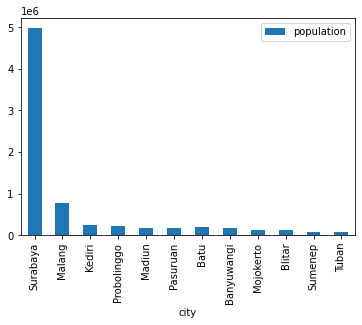

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#jatim_merged.hist(column='Density')
jatim_merged.plot(kind='bar',x='city',y='population')#, color=rainbow[cluster])
plt.show()

**Cluster 1 - Restaurant and City**

In [71]:
jatim_merged.loc[jatim_merged['Cluster Labels'] == 0.0, jatim_merged.columns[[0]+[1]+[2] + list(range(5, jatim_merged.shape[1]))]]

,city,lat,lng,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
145,Surabaya,-7.2458,112.7378,4975000.0,0.0,Chinese Restaurant,BBQ Joint,Asian Restaurant,Coffee Shop,Indonesian Restaurant,Noodle House,Hotel,Convenience Store,Bakery,Pizza Place


**Cluster 2 - Restaurant in Highland**

In [72]:
jatim_merged.loc[jatim_merged['Cluster Labels'] == 1, jatim_merged.columns[[0]+[1]+[2] + list(range(5, jatim_merged.shape[1]))]]

,city,lat,lng,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
977,Malang,-7.9800,112.6200,780000.0,1.0,Indonesian Restaurant,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Pizza Place,Pool,Multiplex,Hotel,Chinese Restaurant,Food Court
2256,Kediri,-7.8166,112.0119,252000.0,1.0,Indonesian Restaurant,Fast Food Restaurant,Café,Coffee Shop,Japanese Restaurant,Asian Restaurant,Bakery,Chinese Restaurant,Seafood Restaurant,Snack Place
2474,Probolinggo,-7.7500,113.2167,223159.0,1.0,Indonesian Restaurant,Hotel,Café,Coffee Shop,Bakery,Restaurant,Noodle House,Asian Restaurant,Dessert Shop,Bistro
2801,Madiun,-7.6300,111.5231,186099.0,1.0,Sundanese Restaurant,Indonesian Meatball Place,Hotel,Indonesian Restaurant,Café,Coffee Shop,Supermarket,Juice Bar,Diner,Soup Place
3040,Banyuwangi,-8.1950,114.3696,172424.0,1.0,Hotel,Indonesian Restaurant,Coffee Shop,Steakhouse,Food Truck,Café,Bakery,Diner,Soccer Stadium,Seafood Restaurant
3617,Mojokerto,-7.4722,112.4336,130196.0,1.0,Department Store,Indonesian Restaurant,Rest Area,Asian Restaurant,Restaurant,Train Station,Park,Market,Donut Shop,Dog Run
3661,Blitar,-8.1000,112.1500,132018.0,1.0,Hotel,Stadium,Food Truck,Indonesian Restaurant,Motel,Plaza,Eastern European Restaurant,Department Store,Chinese Restaurant,Food


**Cluster 3 - Restaurant and Coffe Shop**

In [73]:
jatim_merged.loc[jatim_merged['Cluster Labels'] == 2, jatim_merged.columns[[0]+[1]+[2] + list(range(5, jatim_merged.shape[1]))]]

,city,lat,lng,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2813,Batu,-7.8672,112.5239,190184.0,2.0,Indonesian Restaurant,Coffee Shop,Hotel,Snack Place,Noodle House,Seafood Restaurant,Karaoke Bar,Café,Food Truck,Steakhouse


**Cluster 4 - Convenience Store and Cafe**

In [74]:
jatim_merged.loc[jatim_merged['Cluster Labels'] == 3, jatim_merged.columns[[0]+[1]+[2] + list(range(5, jatim_merged.shape[1]))]]

,city,lat,lng,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2807,Pasuruan,-7.6406,112.9065,186262.0,3.0,Convenience Store,Café,Indonesian Restaurant,Coffee Shop,Noodle House,Japanese Restaurant,Pool,Pizza Place,Supermarket,Department Store
